In [2]:
# We chose this topic because it's very relevant. I'm assuming most (if not everyone) in this class drives to work.
#In populated cities such as Denver, accident rates are likely high. Annecdotally, we see updates of accident 
# fatalities by I-25 and I-70.....

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps

# Google developer API key
from key import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

In [97]:
file = 'accident.csv'
file2015_pd = pd.read_csv(file)
file2015_pd.head()


,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,...,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,...,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,...,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,...,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,...,99,7,16,88,88,0,0,0,1,0


In [98]:
#file2015_pd.info() 
file2015_pd.columns

Index(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY', 'MONTH',
       'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'RUR_URB', 'FUNC_SYS',
       'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE',
       'LONGITUD', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR',
       'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS',
       'DRUNK_DR'],
      dtype='object')

In [5]:
#total fatalities in 2015 
total_fatalities = file2015_pd['FATALS'].sum()
daily_ave = total_fatalities/365
print(f'Across the United States, there were {total_fatalities} fatalities in 2015')
print(f'Daily average: {daily_ave} deaths per day')

Across the United States, there were 35485 fatalities in 2015
Daily average: 97.21917808219177 deaths per day


In [6]:
#fatalities by gender and age (potentially)

In [7]:
#fatalities caused by drunk driving/drivers
drunk_driving = file2015_pd['DRUNK_DR'].sum()
drunk_percent = (drunk_driving/file2015_pd['DRUNK_DR'].count()) *100
print(f'Total accidents related to drunk driving: {drunk_driving}')
print(f'{drunk_percent} percent of the accidents were related to drunk driving/drivers.')

Total accidents related to drunk driving: 9478
29.1281231752666 percent of the accidents were related to drunk driving/drivers.


In [8]:
#fatalities grouped by State
#ALSO LOOK AT COLORADO/DENVER RATES 

states = file2015_pd['STATE'].value_counts()
states.head()

48    3190
6     3123
12    2699
13    1329
37    1275
Name: STATE, dtype: int64

In [9]:
#fatalities depending on month of the year, days of the week, and time of day
months = file2015_pd['MONTH'].value_counts()
months

10    3070
8     3049
7     3021
9     2904
5     2869
12    2862
6     2790
11    2780
4     2439
3     2401
1     2371
2     1983
Name: MONTH, dtype: int64

In [10]:
days = file2015_pd['DAY_WEEK'].value_counts()
days

7    5659
1    5298
6    4917
5    4461
4    4181
2    4038
3    3985
Name: DAY_WEEK, dtype: int64

In [11]:
hours = file2015_pd['HOUR'].value_counts()
hours
#deaths happen around 6pm which is rush hour for most, if not all, states

18    1895
20    1862
17    1838
21    1811
19    1784
15    1686
16    1650
22    1554
14    1511
13    1387
23    1334
0     1265
1     1226
12    1223
2     1207
6     1202
7     1146
11    1126
10    1019
5     1000
9      958
3      946
8      910
4      751
99     248
Name: HOUR, dtype: int64

In [12]:
#fatalities depending on weahter conditions
weather = file2015_pd['WEATHER'].value_counts()
weather

#ELEMENT VALUES:
#00 No Additional Atmospheric Conditions
#01 Clear
#10 Cloudy
#02 Rain
#03 Sleet or Hail
#12 Freezing Rain or Drizzle
#04 Snow
#11 Blowing Snow
#05 Fog, Smog, Smoke
#06 Severe Crosswinds
#07 Blowing Sand, Soil, Dirt
#08 Other
#98 Not Reported
#99 Unknown 

1     23244
10     5547
2      2480
5       403
4       318
99      205
3       100
98      100
8        59
12       24
11       23
6        23
7        13
Name: WEATHER, dtype: int64

In [13]:
#latitude and longitude (location of accidents using heatmap)

In [14]:
#trend from 1994 to 2015 

In [15]:
#fatalities based on age group

In [16]:
#rural or urban
#ELEMENT VALUES:
#C12a: Land Use
#1 Rural
#2 Urban
#6 Traffic Not in State Inventory 
#8 Not Reported
#9 Unknown


rur_urban = file2015_pd['RUR_URB'].value_counts()
rur_urban

2    15789
1    15725
8      795
6      206
9       24
Name: RUR_URB, dtype: int64

In [17]:
#manner of collision
manner = file2015_pd['MAN_COLL'].value_counts()
manner

#ELEMENT VALUES:
#00 Not a Collision with a Motor Vehicle In-Transport
#01 Front-to-Rear
#02 Front-to-Front
#06 Angle
#07 Sideswipe-Same Direction
#08 Sideswipe-Opposite Direction
#09 Rear-to-Side
#10 Rear-to-Rear
#11 Other
#98 Not Reported
#99 Unknown


0     20129
6      5845
2      3305
1      2223
7       513
8       328
11       80
99       55
9        39
98       21
10        1
Name: MAN_COLL, dtype: int64

In [18]:
group_drunk = file2015_pd.groupby('DRUNK_DR')
state_gd = file2015_pd['STATE'].value_counts()
perc_drunk = state_gd/drunk_driving
perc_drunk #PERCENTAGE OF DRUNK DRIVING RELATED FATALITIES IN EACH STATE

48    0.336569
6     0.329500
12    0.284765
13    0.140219
37    0.134522
42    0.116269
36    0.111943
39    0.108567
17    0.096434
45    0.096117
26    0.094535
47    0.093691
4     0.085567
29    0.084723
1     0.082718
18    0.079342
51    0.075121
22    0.073644
21    0.073222
28    0.063727
40    0.062249
55    0.055180
34    0.054969
8     0.053492
53    0.052648
5     0.051804
24    0.050538
41    0.043364
27    0.039565
25    0.034606
20    0.033973
32    0.031336
19    0.029753
35    0.028382
49    0.027221
9     0.027115
54    0.025955
31    0.023001
30    0.021524
16    0.020890
23    0.015193
56    0.013610
10    0.013399
46    0.012239
38    0.011711
33    0.010867
15    0.008968
2     0.006330
50    0.005275
44    0.004326
11    0.002427
Name: STATE, dtype: float64

In [19]:
#Locate Denver == it would be interesting to see since most of us familiar with the city/State
#Colorado = STATE number 8
#CREATE HEAT MAP OF COLORADO ACCIDENTS

colorado = file2015_pd.loc[file2015_pd['STATE'] == 8]
lat = colorado['LATITUDE']
long = colorado['LONGITUD']


In [161]:


co_locations = colorado[["LATITUDE", "LONGITUD"]]
fatal = colorado["FATALS"].astype(float)

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(co_locations, weights=fatal, 
                             dissipating=False, max_intensity=10,
                               point_radius=.6)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
#longitude and latitude of fatalities for heat map #Is weather and daylight related to fatalities #Compare drunk drivers with weather/daylight conditions 
#Does day of the month/weekend lead to more fatalities

#df[df.name != 'Tina']
#df=df.drop(df.index[c])


In [22]:
USA_locations = file2015_pd[["LATITUDE", "LONGITUD"]]
fatal = file2015_pd["FATALS"].astype(float)

#clean dataset 
USA = file2015_pd.loc[file2015_pd["LATITUDE"] != 99.999900]
USA = USA.loc[USA['LATITUDE'] != 77.777700]

locations_USA = USA[["LATITUDE", "LONGITUD"]]
fatal2 = USA['FATALS'].astype(float)


In [159]:
# Plot Heatmap
fig3 = gmaps.figure()

# Create heat layer
heat_layer3 = gmaps.heatmap_layer(locations_USA, weights=fatal2, 
                                dissipating=False, max_intensity=10,
                                point_radius=0.6)


# Add layer
fig3.add_layer(heat_layer3)

# Display figure
fig3

Figure(layout=FigureLayout(height='420px'))

In [24]:
state_group = file2015_pd.groupby('STATE')
state_fatal = state_group['FATALS'].sum() #total fatalities depending on STate 


In [25]:
#Chris #longitude and latitude of fatalities for heat map 
#Is weather and daylight related to fatalities 
#Compare drunk drivers with weather/daylight conditions 
#Does day of the month/weekend lead to more fatalities

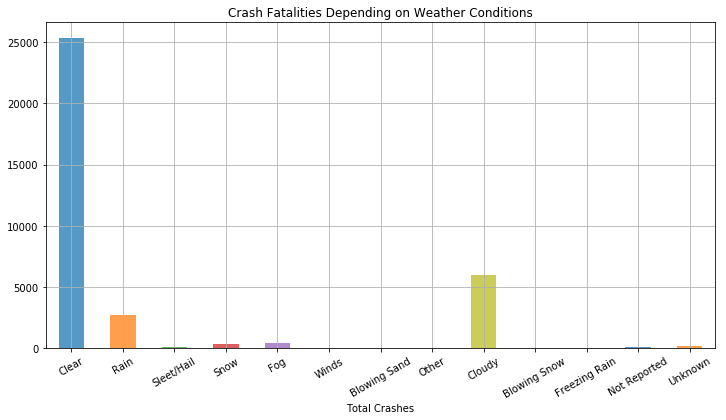

In [141]:
#fatalities depending on weahter conditions
condition = file2015_pd.groupby(['WEATHER']).sum()['FATALS']
labels = ['Clear', 'Rain', 'Sleet/Hail', 'Snow', 'Fog','Winds', 'Blowing Sand', 'Other',
          'Cloudy', 'Blowing Snow', 'Freezing Rain', 'Not Reported', 'Unknown']
condition.index = labels

condition.plot(kind='bar', alpha=0.75, rot=30)




plt.title('Crash Fatalities Depending on Weather Conditions')
plt.xlabel('Total Crashes')
plt.grid(True)
plt.show()

#ELEMENT VALUES:
#00 No Additional Atmospheric Conditions
#01 Clear
#10 Cloudy
#02 Rain
#03 Sleet or Hail
#12 Freezing Rain or Drizzle
#04 Snow
#11 Blowing Snow
#05 Fog, Smog, Smoke
#06 Severe Crosswinds
#07 Blowing Sand, Soil, Dirt
#08 Other
#98 Not Reported
#99 Unknown 

In [27]:
#daylight
hours = file2015_pd['HOUR'].value_counts()
hours
#deaths happen around 6pm which is rush hour for most, if not all, states

18    1895
20    1862
17    1838
21    1811
19    1784
15    1686
16    1650
22    1554
14    1511
13    1387
23    1334
0     1265
1     1226
12    1223
2     1207
6     1202
7     1146
11    1126
10    1019
5     1000
9      958
3      946
8      910
4      751
99     248
Name: HOUR, dtype: int64

In [28]:
#Does day of the month/weekend lead to more fatalities
day = file2015_pd['DAY_WEEK'].value_counts()
day


7    5659
1    5298
6    4917
5    4461
4    4181
2    4038
3    3985
Name: DAY_WEEK, dtype: int64

In [29]:
week_total = file2015_pd['DAY_WEEK'].count()
day_perc = (day/week_total)*100
day_perc

7    17.391438
1    16.282000
6    15.111097
5    13.709702
4    12.849196
2    12.409724
3    12.246842
Name: DAY_WEEK, dtype: float64

<Figure size 2160x720 with 0 Axes>

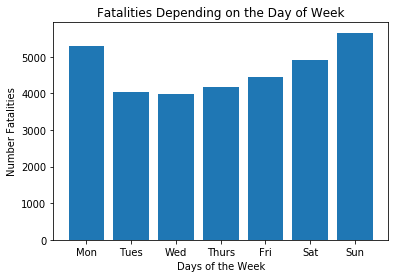

<Figure size 2160x720 with 0 Axes>

In [50]:

days = ['1', '2', '3', '4', '5', '6', '7']
deaths = ['5298','4038','3985','4181', '4461', '4917', '5659']
labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

plt.bar(range(len(days)), list(map(float,deaths)) )
plt.xticks(range(len(days)), labels)
plt.title('Fatalities Depending on the Day of Week')
plt.xlabel('Days of the Week')
plt.ylabel('Number Fatalities')
plt.figure(figsize=(30,10))

#plt.show()

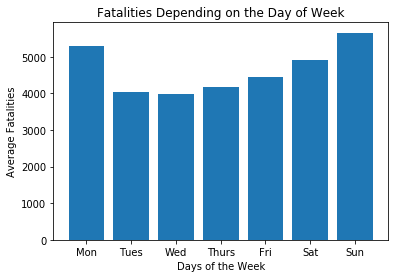

<Figure size 432x288 with 0 Axes>

In [53]:

days = ['1', '2', '3', '4', '5', '6', '7']
deaths = ['5298','4038','3985','4181', '4461', '4917', '5659']
labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

plt.bar(range(len(days)), list(map(float,deaths)) )
plt.xticks(range(len(days)), labels)
plt.title('Fatalities Depending on the Day of Week')
plt.xlabel('Days of the Week')
plt.ylabel('Average Fatalities')
#plt.figure(figsize=(30,10))


plt.show()
plt.savefig('output3.png')

In [32]:
group_drunk_test = file2015_pd.groupby(['DRUNK_DR', 'DAY_WEEK']).sum()['FATALS']
group_drunk_test


DRUNK_DR  DAY_WEEK
0         1           3446
          2           3508
          3           3380
          4           3577
          5           3678
          6           3867
          7           3784
1         1           2312
          2            848
          3            891
          4            927
          5           1140
          6           1418
          7           2364
2         1             92
          2             22
          3             20
          4             33
          5             22
          6             40
          7            112
3         1              3
          7              1
Name: FATALS, dtype: int64

In [33]:
#I THINK MELISSA IS RESPONSIBLE FOR THIS 
month = file2015_pd['MONTH'].value_counts()
month

10    3070
8     3049
7     3021
9     2904
5     2869
12    2862
6     2790
11    2780
4     2439
3     2401
1     2371
2     1983
Name: MONTH, dtype: int64

In [34]:
#Fatalities caused by drunk driving/drivers
drunk_driving = file2015_pd['DRUNK_DR'].sum()
drunk_percent = (drunk_driving/file2015_pd['DRUNK_DR'].count()) *100
print(f'Total accidents related to drunk driving: {drunk_driving}')
print(f'{drunk_percent} percent of the accidents were related to drunk driving/drivers.')

Total accidents related to drunk driving: 9478
29.1281231752666 percent of the accidents were related to drunk driving/drivers.


In [35]:
#PERCENTATGE OF DRUNK DRIVING RELATED INCIDENT PER STATE
group_drunk = file2015_pd.groupby('DRUNK_DR')
state_gd = file2015_pd['STATE'].value_counts()
perc_drunk = state_gd/drunk_driving
perc_drunk #PERCENTAGE OF DRUNK DRIVING RELATED FATALITIES IN EACH STATE


48    0.336569
6     0.329500
12    0.284765
13    0.140219
37    0.134522
42    0.116269
36    0.111943
39    0.108567
17    0.096434
45    0.096117
26    0.094535
47    0.093691
4     0.085567
29    0.084723
1     0.082718
18    0.079342
51    0.075121
22    0.073644
21    0.073222
28    0.063727
40    0.062249
55    0.055180
34    0.054969
8     0.053492
53    0.052648
5     0.051804
24    0.050538
41    0.043364
27    0.039565
25    0.034606
20    0.033973
32    0.031336
19    0.029753
35    0.028382
49    0.027221
9     0.027115
54    0.025955
31    0.023001
30    0.021524
16    0.020890
23    0.015193
56    0.013610
10    0.013399
46    0.012239
38    0.011711
33    0.010867
15    0.008968
2     0.006330
50    0.005275
44    0.004326
11    0.002427
Name: STATE, dtype: float64

In [36]:
#Day of the month 
day_of_month = file2015_pd['DAY'].value_counts()
day_of_month

3     1149
11    1146
5     1123
18    1121
4     1107
6     1104
12    1104
17    1098
7     1096
16    1095
14    1093
24    1077
25    1076
13    1075
26    1066
23    1066
1     1066
10    1063
9     1061
15    1056
19    1049
22    1044
2     1043
21    1024
8     1020
27    1020
20    1009
28     985
30     945
29     906
31     652
Name: DAY, dtype: int64

In [37]:
file2_path= 'yearly_fatalities.csv'
file2_pd = pd.read_csv(file2_path)
file2_pd

,Year,Fatalities
0,1994,40716
1,1995,41817
2,1996,42065
3,1997,42013
4,1998,41501
5,1999,41717
6,2000,41945
7,2001,42196
8,2002,43005
9,2003,42884


<Figure size 432x288 with 0 Axes>

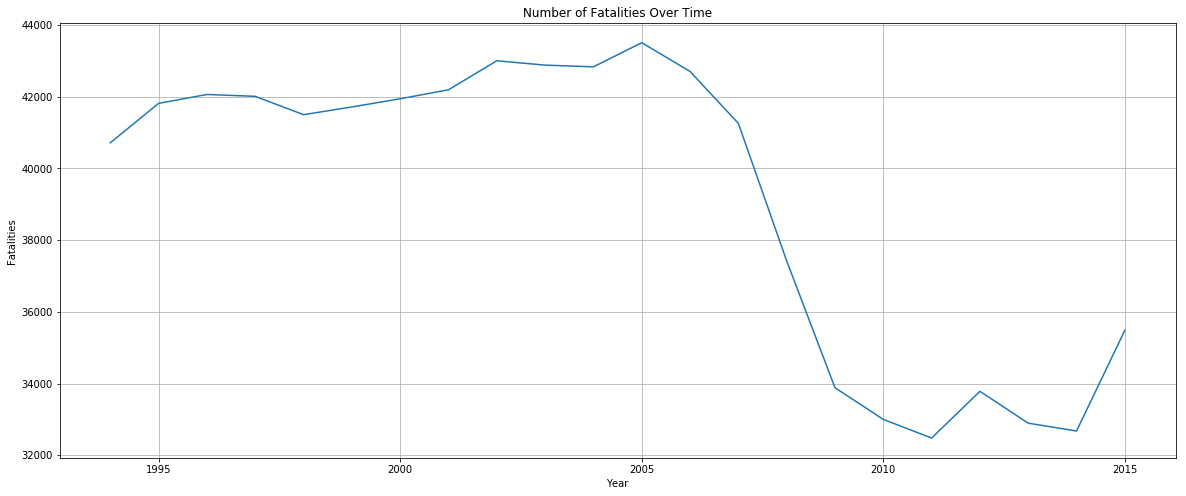

In [38]:
fig_trend = plt.figure()
fig_trend = plt.figure(figsize=(20,8))
ax = plt.axes()

#x = np.arange(1, 23, 1)
x = file2_pd['Year ']
y = file2_pd['Fatalities']
label = [i for i in file2_pd['Year ']]
ax.plot(x, y)
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.title('Number of Fatalities Over Time')
plt.grid(True)

In [39]:
file3_path= 'person.csv'
file3_pd = pd.read_csv(file3_path)
file3_pd

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,127,1,1,2,...,240,0,0,0,0,0,0,7,1,0
1,1,10002,1,1,1,0,83,1,1,22,...,2213,0,0,0,0,0,0,7,1,0
2,1,10003,1,1,1,0,11,1,1,1,...,125,0,0,0,0,0,0,7,2,0
3,1,10003,1,1,2,0,11,1,1,1,...,8888,999,99,0,0,0,8,0,0,0
4,1,10004,1,1,1,0,45,4,1,0,...,57,0,0,0,0,0,0,7,1,0
5,1,10005,2,1,1,0,45,7,1,7,...,709,0,0,0,0,0,0,7,1,0
6,1,10005,2,2,1,0,45,7,1,7,...,8888,999,99,0,0,0,8,0,0,0
7,1,10006,1,1,1,0,111,8,1,9,...,1239,2,40,0,0,0,0,7,1,0
8,1,10006,1,1,2,0,111,8,1,9,...,8888,999,99,0,0,0,8,0,0,0
9,1,10007,1,1,1,0,89,8,1,18,...,9999,999,99,0,0,0,0,7,1,0


In [40]:
#Car body type
file3_pd['BODY_TYP'].value_counts()

4.0     22047
31.0    10370
14.0     9117
80.0     5338
15.0     3790
2.0      3393
66.0     3221
20.0     3149
30.0     2462
6.0      2394
21.0     1187
5.0       967
3.0       831
99.0      785
63.0      651
16.0      629
1.0       509
90.0      449
50.0      370
52.0      281
62.0      281
61.0      235
9.0       191
67.0      186
40.0      175
81.0      158
51.0      136
88.0      111
92.0      111
97.0       78
        ...  
73.0       57
83.0       53
22.0       51
55.0       46
49.0       37
82.0       34
95.0       34
8.0        34
39.0       29
65.0       29
32.0       28
28.0       28
60.0       27
10.0       22
48.0       18
12.0       17
89.0       16
93.0       14
72.0       10
7.0         9
91.0        9
42.0        7
17.0        7
11.0        5
71.0        5
45.0        4
79.0        4
19.0        4
98.0        4
94.0        1
Name: BODY_TYP, Length: 65, dtype: int64

In [41]:
file3_pd.loc[file3_pd['AGE'] != 999]
age = file3_pd.loc[file3_pd['AGE'] != 999]
age_test = age['AGE'].value_counts()
age_test

22     2077
21     2065
23     2014
19     1957
20     1955
18     1925
24     1922
25     1836
26     1697
27     1636
17     1543
29     1512
28     1404
31     1383
30     1354
32     1319
35     1273
33     1253
51     1252
34     1237
37     1204
53     1185
54     1183
55     1164
50     1159
36     1139
52     1132
44     1128
56     1118
38     1114
       ... 
4       378
11      371
7       365
0       342
77      336
78      329
80      317
79      297
82      277
83      266
81      265
84      254
85      241
86      204
87      191
88      172
89      139
90      111
91       90
92       67
93       53
94       45
95       28
96       16
97       12
98        6
114       3
99        2
101       1
103       1
Name: AGE, Length: 104, dtype: int64

In [42]:
file3_pd['SEX'].value_counts()
#1 Male
#2 Female
#8 Not Reported
#9 Unknown 

1    53200
2    26985
9      970
8      467
Name: SEX, dtype: int64

In [43]:

sex_group = file3_pd.groupby('SEX')

# Count how many times each sex appears in our group
count_sex = sex_group['SEX'].count()
sex_total = file3_pd['SEX'].count()
count_sex, sex_total

(SEX
 1    53200
 2    26985
 8      467
 9      970
 Name: SEX, dtype: int64, 81622)

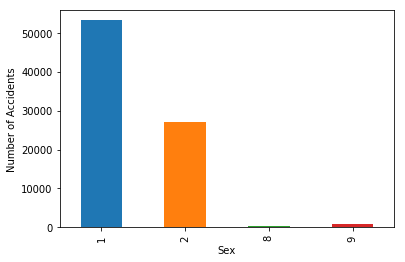

<Figure size 432x288 with 0 Axes>

In [44]:
count_chart = count_sex.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Sex")
count_chart.set_ylabel("Number of Accidents")


plt.show()
plt.tight_layout()

In [45]:
#proportion of accidents involving each gender 
sex_percent = (count_sex/sex_total)*100
sex_percent

SEX
1    65.178506
2    33.060939
8     0.572150
9     1.188405
Name: SEX, dtype: float64

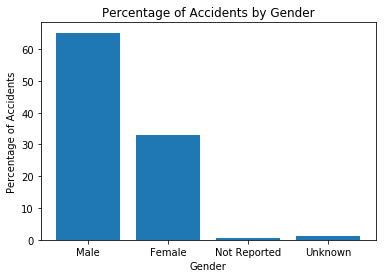

In [46]:
sex_code = ['1', '2', '8', '9']
sex_number = [i for i in sex_percent]
labels = ['Male', 'Female', 'Not Reported', 'Unknown']

plt.bar(range(len(sex_code)), list(map(float,sex_number)) )
plt.xticks(range(len(sex_code)), labels)
plt.title('Percentage of Accidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Accidents')


plt.show()

In [240]:
print(f'Individuals involved in a vehicular accident in 2015: {sex_total}')

Individuals involved in a vehicular accident in 2015: 81622


In [250]:
#order of slides
#Individuals involved in a vehicular accident in 2015
#Gender Breakdown of those involved in accidents
#Vehicular Accident Fatalties in 2015 (no gender breakdown unfortunately)
#Fatalities in 2015 seem high, but trend from early 90s to 2015 show a signficant decline (SHOW TREND)
#Hypotheses etc 
#We are focusing on the most recent data we could find (which is 2015) to see what conditions influence these accidents
#... e.g., when are these more likely to occur (e.g., days, weeks), are these mostly related to DD, etc.,
#... do accidents stem from weather hazards, driver error/impairment, etc. 



# conclusion....  Based on yearly trends, great progress as far as reducing yearly fatalities 
#Accidents/Fatalities seem to stem from driver impairment. Drunk driving is still a signficant problem 
#Fatal crashes increase at the end of the week (Friday to Monday)
#Fatalities higher during rush hour traffic
#No difference in urban and rural and rural areas 



#Future Direction
#examine trend over time more closely (e.g., drunk driving changes over time, etc.)
#incorporate this with other datasets (e.g., datasets from other countries to make comparisons)


In [73]:
#group drunk driver 
group_drunk = file2015_pd.groupby('DRUNK_DR')
weather_drunk = group_drunk['DAY_WEEK'].sum()
weather_drunk
        
        
    

DRUNK_DR
0    95133
1    37223
2     1109
3        8
Name: DAY_WEEK, dtype: int64

In [111]:
file2015_pd['DrunkOrNot'] = np.where(file2015_pd['DRUNK_DR']>=1, 'yes', 'no')
#group by new drunk driver variable and get fatalities through the week
group_drunk = file2015_pd.groupby(['DrunkOrNot', 'DAY_WEEK'])['FATALS'].count()
group_drunk

DrunkOrNot  DAY_WEEK
no          1           3160
            2           3244
            3           3158
            4           3307
            5           3410
            6           3582
            7           3463
yes         1           2138
            2            794
            3            827
            4            874
            5           1051
            6           1335
            7           2196
Name: FATALS, dtype: int64

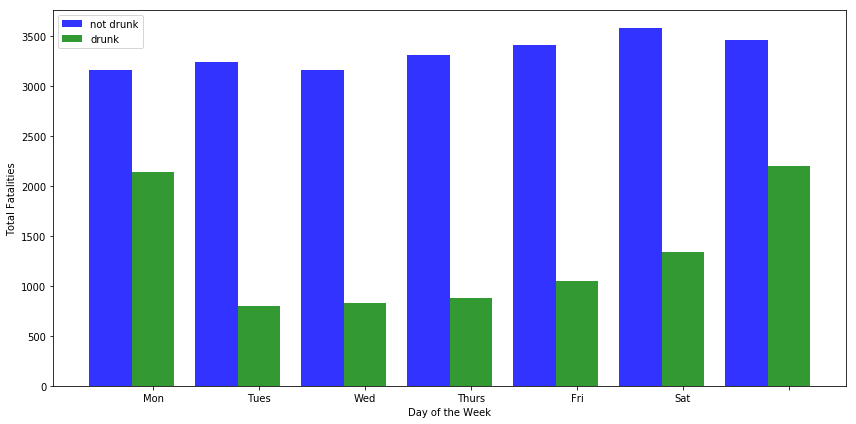

In [156]:
#bar graph of alchohol-related accidents
n_groups = 7

#data to plot
no_drunk = (3160, 3244, 3158, 3307, 3410, 3582, 3463)
drunk = (2138, 794, 827, 874, 1051, 1335, 2196)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.8

rects1 = plt.bar(index, no_drunk, bar_width,
                 alpha=opacity,
                 color='b',
                 label='not drunk')
 
rects2 = plt.bar(index + bar_width, drunk, bar_width,
                 alpha=opacity,
                 color='g',
                 label='drunk')

plt.xlabel('Day of the Week')
plt.ylabel('Total Fatalities')
plt.xticks(index + bar_width, ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [116]:
group_drunk_hr = file2015_pd.groupby(['DrunkOrNot', 'WEATHER'])['FATALS'].count()
group_drunk_hr


DrunkOrNot  WEATHER
no          1          16488
            2           1854
            3             88
            4            262
            5            302
            6             21
            7             10
            8             43
            10          4004
            11            21
            12            24
            98            71
            99           136
yes         1           6756
            2            626
            3             12
            4             56
            5            101
            6              2
            7              3
            8             16
            10          1543
            11             2
            98            29
            99            69
Name: FATALS, dtype: int64

In [150]:
group_city = file2015_pd.groupby(['RUR_URB', 'STATE'])['FATALS'].sum()
locate = group_city[['LATITUDE', 'LONGITUD']]
